# Exercice 1: les bases de l'ACP

## Question 1: Normalisation des données

Écrire une fonction standardize_data(data) qui prend comme paramètres des données dataset les retournes normalisées en utilisant la méthode StandardScalerde Scikit-Learn.

La classe Standardscaler part du principe que les données sont normalement distribuées. Elle permet de transformer chaque caractéristique afin qu'elle ait une valeur moyenne de 0 et un écart type de 1

In [7]:
import numpy as np
import sklearn.preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [8]:
def standardize_data(data: np.ndarray) -> np.ndarray:
    """
    Standardizes the input data using the StandardScaler from sklearn.preprocessing.

    Parameters:
        data (np.ndarray): The input data to be standardized.

    Returns:
        np.ndarray: The standardized data.

    """
    data = sklearn.preprocessing.StandardScaler().fit_transform(data)
    return data

## Question 2: Calcul de la matrice de covariance

Écrire une fonction covariance(data)qui calcule et retourne la matrice de covariance dutableau des caractéristiques data

In [9]:
def cov_matrix(data: np.ndarray) -> np.ndarray:
    """
    Calculates the covariance matrix of the input data.

    Parameters:
        data (np.ndarray): The input data.

    Returns:
        np.ndarray: The covariance matrix of the input data.

    """
    return np.cov(data, rowvar=False)

## Question 3: Calcul des valeurs propres et vecteurs propres

Écrire un script permettant de décomposer la matrice de covariance en valeurs et vecteurs propres

In [10]:
def decompose_cov_matrix(data: np.ndarray) -> tuple:
    """
    Decomposes the covariance matrix of the given data.

    Parameters:
        data (np.ndarray): The input data array.

    Returns:
        tuple: A tuple containing the eigenvalues and eigenvectors of the covariance matrix.
    """
    cov_mat = cov_matrix(data)
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    return eigenvalues, eigenvectors

## Question 4: compute ACP

Écrire une fonction compute_ACP permettant d’appliquer un ACPsur les données en entrée data

In [11]:
def compute_ACP(data : np.ndarray, n_components=None):
    """
    Computes the Principal Component Analysis (PCA) on the given data.

    Parameters:
    - data: numpy.ndarray
        The input data for PCA.
    - n_components: int or None, optional (default=None)
        The number of components to keep. If None, all components are kept.

    Returns:
    - transformed_data: numpy.ndarray
        The transformed data after applying PCA.
    - explained_variance_ratio: numpy.ndarray
        The ratio of explained variance for each principal component.
    - pca: sklearn.decomposition.PCA
        The PCA object used for the transformation.

    """
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)
    explained_variance_ratio = pca.explained_variance_ratio_
    return transformed_data, explained_variance_ratio, pca

## Question 5: Variance expliquee

Écrire un script permettant de calculer le pourcentage de variance expliquée pour chaque composante principale

In [12]:
def compute_ACP(data : np.ndarray, n_components=None):
    """
    Computes the Principal Component Analysis (PCA) on the given data.

    Parameters:
    - data: numpy.ndarray
        The input data for PCA.
    - n_components: int or None, optional (default=None)
        The number of components to keep. If None, all components are kept.

    Returns:
    - transformed_data: numpy.ndarray
        The transformed data after applying PCA.
    - explained_variance_ratio: numpy.ndarray
        The ratio of explained variance for each principal component.
    - pca: sklearn.decomposition.PCA
        The PCA object used for the transformation.

    """
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)
    explained_variance_ratio = pca.explained_variance_ratio_
    return transformed_data, explained_variance_ratio, pca

## Question 6: Projection des données

Dans un programme principalcompute_ACP(data):

1. Générez un ensemble de 500 vecteurs dans l’espace 3D, suivant une loi normale (de moyenne nulle et de variance unitaire), ensuite visualisez les points générés (utiliser np.random.randn(500,3)).

2. Appellerla fonction compute_ACP et l’appliquer aux données générées

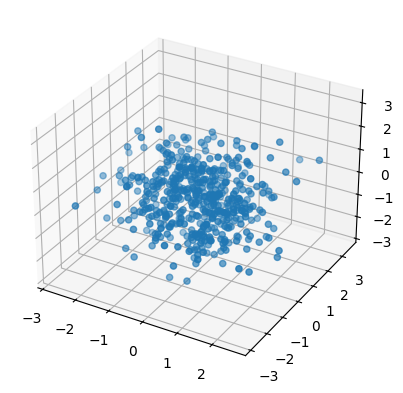

Transformed Data:
 [[ 0.36732544 -0.41304188  1.19384   ]
 [-0.27741067 -1.04013886 -0.55944286]
 [-1.90080949  0.21154698 -1.34943617]
 ...
 [-0.11913397  0.96890548  0.5379727 ]
 [ 1.49167024  1.50166731  0.22047423]
 [-1.64093607  2.42364677 -1.03620008]]
Explained Variance Ratio:
 [0.34982863 0.34768501 0.30248636]


In [13]:
if __name__ == "__main__":
    # Générer 500 vecteurs dans l'espace 3D
    data = np.random.randn(500,3)

    # Visualiser les points générés
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2])
    plt.show()

    # Appliquer la fonction compute_ACP aux données générées
    transformed_data, explained_variance_ratio, pca = compute_ACP(data)
    print("Transformed Data:\n", transformed_data)
    print("Explained Variance Ratio:\n", explained_variance_ratio)